# Trabalho Final

Alunos:
- Ítalo Cezar Eugênio de Santana(UC22102126)
- Jairo Pereira de Sousa Júnior(UC22101494)

# Sobre nossa base

### Descrição da Base de Dados e Limpeza Inicial

Neste trabalho, utilizaremos uma base de dados contendo informações sobre a arrecadação de impostos e contribuições federais administrados pela Secretaria Especial da Receita Federal do Brasil (RFB). Esta base de dados é crucial para entender o comportamento da arrecadação fiscal no Brasil e realizar análises financeiras e econômicas detalhadas.

#### Limpeza Manual dos Dados

Antes de proceder com a análise exploratória e a modelagem dos dados, realizamos uma série de etapas de limpeza manual para garantir a qualidade e a integridade dos dados. A seguir, descrevemos as principais ações de limpeza realizadas:

1. **Eliminação de Colunas Desnecessárias**:
   - Algumas colunas que não eram relevantes para nossa análise foram eliminadas da base de dados. Isso ajudou a simplificar o dataset e a focar nas informações mais pertinentes.

2. **Substituição de Delimitadores**:
   - Observamos que os delimitadores dos dados estavam inconsistentes, com vírgulas (`,`) sendo usadas em vez de pontos e vírgulas (`;`). Corrigimos esse problema substituindo as vírgulas pelos pontos e vírgulas apropriados, garantindo uma leitura correta dos dados.

3. **Correção de Tipos de Dados**:
   - Identificamos que várias colunas que deveriam conter valores numéricos estavam sendo interpretadas como texto (tipo `object`). Isso estava causando erros nas análises.
   - Para resolver isso, manualmente extraímos e convertemos os valores dessas colunas para o tipo `float`. Esta transformação foi essencial para permitir cálculos e análises precisas.

Essas etapas de limpeza foram fundamentais para preparar os dados para a análise exploratória inicial e subsequente modelagem preditiva. Com os dados devidamente limpos e estruturados, estamos agora prontos para proceder com uma análise detalhada e tirar insights significativos sobre a arrecadação de impostos e contribuições federais no Brasil.


Link: https://dados.gov.br/dados/conjuntos-dados/resultado-da-arrecadacao

# Bibliotecas necessárias:

Neste trabalho de Data Science, utilizaremos diversas bibliotecas essenciais para realizar análises de dados, visualizações e modelagem preditiva.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import pandas as pd
import scipy.stats as stat
import seaborn as sns
import os
import pandas
import sklearn
import ydata_profiling

# Carga Correta dos Dados e Análise Exploratória Inicial: 10%
- Head
- Info
- Describe
- Quantidade de nulos e etc

In [2]:

# Configurações do seaborn
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("muted"))

# Caminho do arquivo
arquivo = os.path.join('dados', '_Novas Tecnologias - Arrecadação por UF.csv')

# Leitura dos dados
dados = pd.read_csv(arquivo)

# Lista das colunas numéricas
colunas_numericas = [
    'IMPOSTO SOBRE IMPORTAÇÃO', 'IMPOSTO SOBRE EXPORTAÇÃO', 'IPI - FUMO',
    'IPI - BEBIDAS', 'IPI - AUTOMÓVEIS', 'IPI - VINCULADO À IMPORTACAO',
    'IPI - OUTROS', 'IRPF', 'IRPJ - ENTIDADES FINANCEIRAS',
    'IRPJ - DEMAIS EMPRESAS', 'IRRF - RENDIMENTOS DO TRABALHO',
    'IRRF - RENDIMENTOS DO CAPITAL', 'IRRF - REMESSAS P/ EXTERIOR',
    'IRRF - OUTROS RENDIMENTOS', 'IMPOSTO S/ OPERAÇÕES FINANCEIRAS',
    'IMPOSTO TERRITORIAL RURAL', 'CPMF', 'COFINS'
]

# Filtra as colunas que existem no dataset
colunas_numericas_ajustadas = [coluna for coluna in colunas_numericas if coluna in dados.columns]

# Converte as colunas numéricas de string para float
for coluna in colunas_numericas_ajustadas:
    dados[coluna] = pd.to_numeric(dados[coluna].astype(str).str.replace('.', '', regex=False).str.replace(',', '.', regex=False), errors='coerce')

# Cria uma nova coluna para o total arrecadado
dados['TOTAL_ARRECADADO'] = dados[colunas_numericas_ajustadas].sum(axis=1)

# Agrupa os dados por 'UF' e soma as colunas numéricas
dados_somados = dados.groupby('UF')[colunas_numericas_ajustadas + ['TOTAL_ARRECADADO']].sum()

print(dados_somados)

    IMPOSTO SOBRE IMPORTAÇÃO  IMPOSTO SOBRE EXPORTAÇÃO    IPI - FUMO  \
UF                                                                     
AC              6.233261e+06              9.226220e+05  3.473433e+07   
AL              8.024062e+08              3.055808e+06  1.416634e+08   
AM              1.173158e+10              3.175777e+05  1.742951e+08   
AP              3.400803e+07              1.865196e+04  5.657959e+07   
BA              1.431568e+10              2.792314e+07  6.669423e+08   
CE              9.714864e+09              5.133874e+06  3.655718e+08   
DF              8.615418e+08              4.956208e+05  3.901966e+08   
ES              4.097144e+10              7.209326e+07  4.054167e+08   
GO              1.009697e+10              1.056817e+07  5.019703e+08   
MA              1.580299e+09              4.554501e+05  1.406826e+08   
MG              2.131517e+10              9.959488e+06  5.018875e+10   
MS              7.246752e+08              2.076797e+07  1.113818

In [49]:
#Utilização do método head() para visualizar as primeiras linhas do dataset e entender sua estrutura básica.
dados.head()

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS,TOTAL_ARRECADADO
0,2000,Janeiro,AC,231.0,0.0,292096.0,0.0,0.0,167.0,1558.0,...,676835.0,1084940.0,27652.0,570.0,30894.0,1220.0,28447.0,103.0,1770475.0,4093028.0
1,2000,Janeiro,AL,475088.0,33873.0,1329338.0,812470.0,0.0,141735.0,3676847.0,...,2672106.0,4454947.0,544056.0,191382.0,309573.0,26939.0,4252539.0,97248.0,7493570.0,26973076.0
2,2000,Janeiro,AM,11679405.0,0.0,1507146.0,1791471.0,27796.0,4414483.0,1800346.0,...,10058713.0,10174718.0,1241708.0,3580022.0,1029164.0,843881.0,40171.0,832562.0,44000981.0,93814018.0
3,2000,Janeiro,AP,24267.0,0.0,424862.0,1419.0,321.0,22333.0,12165.0,...,586572.0,1444486.0,205031.0,5825.0,34602.0,6999.0,6477.0,0.0,1682102.0,4640822.0
4,2000,Janeiro,BA,10476457.0,13.0,5542123.0,11533707.0,0.0,7496476.0,23743858.0,...,25695696.0,27277025.0,13374802.0,2302766.0,2022200.0,1218485.0,2446535.0,11923442.0,81027229.0,228756839.0


In [50]:
# Utilização do método info() para obter informações sobre o tipo de dados em cada coluna, número de entradas não nulas e uso de memória.
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7857 entries, 0 to 7856
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ano                               7857 non-null   int64  
 1   Mês                               7857 non-null   object 
 2   UF                                7857 non-null   object 
 3   IMPOSTO SOBRE IMPORTAÇÃO          7576 non-null   float64
 4   IMPOSTO SOBRE EXPORTAÇÃO          7812 non-null   float64
 5   IPI - FUMO                        7565 non-null   float64
 6   IPI - BEBIDAS                     7565 non-null   float64
 7   IPI - AUTOMÓVEIS                  7742 non-null   float64
 8   IPI - VINCULADO À IMPORTACAO      7618 non-null   float64
 9   IPI - OUTROS                      7596 non-null   float64
 10  IRPF                              7553 non-null   float64
 11  IRPJ - ENTIDADES FINANCEIRAS      7710 non-null   float64
 12  IRPJ -

In [51]:
#  Utilização do método describe() para gerar estatísticas descritivas resumidas dos dados numéricos, como média, desvio padrão, mínimo, quartis e máximo.
dados.describe()

,Ano,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,IRPF,IRPJ - ENTIDADES FINANCEIRAS,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS,TOTAL_ARRECADADO
count,7857.000000,7.576000e+03,7.812000e+03,7.565000e+03,7.565000e+03,7.742000e+03,7.618000e+03,7.596000e+03,7.553000e+03,7.710000e+03,7.476000e+03,7.482000e+03,7.641000e+03,7.674000e+03,7.640000e+03,7.695000e+03,7.796000e+03,7.619000e+03,7.405000e+03,7.857000e+03
mean,2011.628866,8.843170e+07,6.410363e+05,1.231726e+07,7.692383e+06,1.140088e+07,4.120797e+07,5.724626e+07,7.668695e+07,4.816696e+07,3.261268e+08,2.567637e+08,1.247459e+08,6.241393e+07,2.635833e+07,7.904617e+07,3.093999e+06,2.216815e+07,1.387076e+07,1.210475e+09
std,7.001653,2.602518e+08,2.171724e+07,5.284756e+07,1.416290e+07,3.425511e+07,1.049299e+08,1.638917e+08,2.257140e+08,2.313112e+08,1.041055e+09,6.953243e+08,5.637184e+08,2.987107e+08,8.146630e+07,3.376787e+08,1.594648e+07,1.537094e+08,1.063520e+08,3.539161e+09
min,2000.000000,-5.915950e+05,-3.379762e+06,-4.329186e+07,-1.079723e+07,-5.424603e+06,0.000000e+00,-3.485777e+06,1.036410e+02,-8.099953e+06,3.037600e+02,-7.471250e+07,-1.872138e+08,-2.590460e+08,-2.555620e+06,-2.689010e+05,-1.775623e+07,-3.496452e+06,0.000000e+00,-4.598430e+06
25%,2006.000000,1.455566e+05,0.000000e+00,0.000000e+00,3.581455e+05,0.000000e+00,9.084081e+04,1.293855e+06,4.329092e+06,3.170477e+03,1.226223e+07,1.105071e+07,6.550850e+05,1.094368e+05,7.573428e+05,1.799975e+05,7.161761e+04,0.000000e+00,0.000000e+00,3.475354e+07
50%,2012.000000,4.568057e+06,3.243250e+02,2.012356e+04,2.732534e+06,2.374140e+03,1.768570e+06,4.220059e+06,1.560704e+07,2.349612e+05,4.692312e+07,3.634489e+07,3.405593e+06,1.438582e+06,2.841787e+06,1.802837e+06,2.655685e+05,0.000000e+00,0.000000e+00,1.499801e+08
75%,2018.000000,6.108894e+07,8.588267e+03,1.744235e+06,8.547034e+06,6.533904e+05,3.334958e+07,4.223042e+07,5.183784e+07,8.159727e+06,1.986015e+08,1.275928e+08,2.273274e+07,1.189903e+07,1.126595e+07,1.164796e+07,1.086750e+06,1.137684e+05,0.000000e+00,6.902583e+08
max,2024.000000,2.795288e+09,1.206944e+09,8.944776e+08,1.456451e+08,3.476686e+08,1.152147e+09,1.666053e+09,5.299245e+09,7.729619e+09,2.293867e+10,9.756350e+09,1.446338e+10,6.713613e+09,9.338009e+08,3.763449e+09,3.751499e+08,2.332493e+09,2.299033e+09,5.926420e+10


In [52]:
# Quantidade de Valores Nulos: Identificação e contagem de valores nulos em cada coluna para avaliar a qualidade dos dados e a necessidade de tratamento de dados faltantes.
dados.isnull().sum().sum(0)

4261

# Correção de problemas da base (conversão de tipos, eliminação de dados faltantes, etc) : 10%

<Axes: xlabel='Mês'>

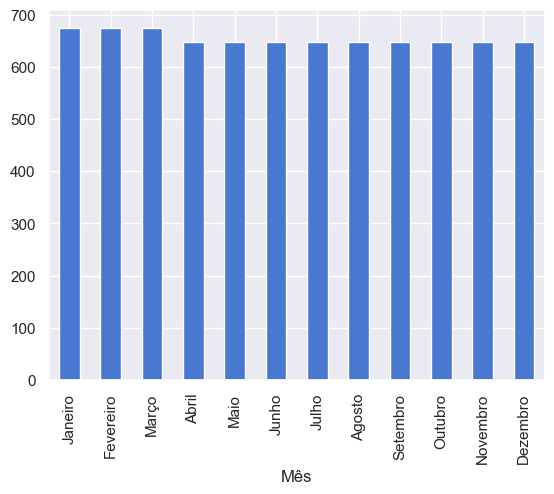

In [53]:
dados.Mês.value_counts().plot.bar()

In [54]:
dados[dados.isnull().any(axis=1)]

,Ano,Mês,UF,IMPOSTO SOBRE IMPORTAÇÃO,IMPOSTO SOBRE EXPORTAÇÃO,IPI - FUMO,IPI - BEBIDAS,IPI - AUTOMÓVEIS,IPI - VINCULADO À IMPORTACAO,IPI - OUTROS,...,IRPJ - DEMAIS EMPRESAS,IRRF - RENDIMENTOS DO TRABALHO,IRRF - RENDIMENTOS DO CAPITAL,IRRF - REMESSAS P/ EXTERIOR,IRRF - OUTROS RENDIMENTOS,IMPOSTO S/ OPERAÇÕES FINANCEIRAS,IMPOSTO TERRITORIAL RURAL,CPMF,COFINS,TOTAL_ARRECADADO
342,2001,Janeiro,RJ,NaN,14.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,216.648,NaN,NaN,2.306480e+02
343,2001,Janeiro,RN,NaN,0.000,NaN,NaN,0.0,6.589250e+02,9.758230e+02,...,NaN,NaN,NaN,7.326950e+02,4.120760e+02,3.525900e+01,28.530,8.379600e+01,NaN,4.334311e+03
344,2001,Janeiro,RS,NaN,819.492,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,621.061,NaN,NaN,1.440553e+03
345,2001,Janeiro,RO,1.241070e+02,0.000,6.690000e+02,0.0,32.0,5.676900e+01,1.221190e+02,...,NaN,NaN,3.150340e+02,1.520000e+02,1.364350e+02,7.714000e+00,174.812,1.407670e+02,NaN,2.285262e+03
346,2001,Janeiro,RR,6.400000e+01,0.000,2.829110e+02,0.0,0.0,5.244000e+00,2.396000e+00,...,NaN,6.616010e+02,1.212120e+02,0.000000e+00,3.345500e+01,0.000000e+00,11.846,5.381000e+00,NaN,1.347009e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,2004,Janeiro,PR,6.113739e+07,241977.000,0.000000e+00,6144292.0,15540393.0,2.202555e+07,3.106704e+07,...,153142717.0,6.599893e+07,1.344162e+08,5.997938e+06,1.153495e+07,1.548263e+07,594493.000,9.809687e+07,NaN,6.482514e+08
1312,2004,Janeiro,PE,9.801585e+06,0.000,6.454637e+06,14221570.0,0.0,6.507476e+06,1.116796e+07,...,43731934.0,2.819124e+07,1.367337e+07,1.237658e+06,2.839375e+06,1.033602e+06,277095.000,3.349592e+06,NaN,1.494008e+08
1313,2004,Janeiro,PI,8.348000e+03,0.000,7.857780e+05,2830858.0,0.0,1.164000e+03,3.354850e+05,...,5196799.0,3.838046e+06,1.245318e+07,6.435000e+03,2.848460e+05,9.187200e+04,156064.000,2.268320e+05,NaN,2.675960e+07
1314,2004,Janeiro,RJ,4.893447e+07,58960.000,2.543280e+07,31333459.0,8955649.0,2.896256e+07,4.526383e+07,...,801856231.0,4.880196e+08,3.888560e+08,9.039044e+07,4.187940e+07,2.864793e+07,440938.000,4.840341e+07,NaN,2.339294e+09


In [55]:
# Proporçãode dados faltantes
proporcaoDadosFaltantes = (dados.isnull().sum()/len(dados))
proporcaoDadosFaltantes

Ano                                 0.000000
Mês                                 0.000000
UF                                  0.000000
IMPOSTO SOBRE IMPORTAÇÃO            0.035764
IMPOSTO SOBRE EXPORTAÇÃO            0.005727
IPI - FUMO                          0.037164
IPI - BEBIDAS                       0.037164
IPI - AUTOMÓVEIS                    0.014637
IPI - VINCULADO À IMPORTACAO        0.030419
IPI - OUTROS                        0.033219
IRPF                                0.038692
IRPJ - ENTIDADES FINANCEIRAS        0.018709
IRPJ - DEMAIS EMPRESAS              0.048492
IRRF - RENDIMENTOS DO TRABALHO      0.047728
IRRF - RENDIMENTOS DO CAPITAL       0.027491
IRRF - REMESSAS P/ EXTERIOR         0.023291
IRRF - OUTROS RENDIMENTOS           0.027619
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    0.020619
IMPOSTO TERRITORIAL RURAL           0.007764
CPMF                                0.030291
COFINS                              0.057528
TOTAL_ARRECADADO                    0.000000
dtype: flo

In [59]:
print(sum(proporcaoDadosFaltantes == 0))
print(dados.columns[proporcaoDadosFaltantes == 0])

4
Index(['Ano', 'Mês', 'UF', 'TOTAL_ARRECADADO'], dtype='object')


In [56]:
dados = dados.dropna()

In [57]:
dados.isnull().sum()

Ano                                 0
Mês                                 0
UF                                  0
IMPOSTO SOBRE IMPORTAÇÃO            0
IMPOSTO SOBRE EXPORTAÇÃO            0
IPI - FUMO                          0
IPI - BEBIDAS                       0
IPI - AUTOMÓVEIS                    0
IPI - VINCULADO À IMPORTACAO        0
IPI - OUTROS                        0
IRPF                                0
IRPJ - ENTIDADES FINANCEIRAS        0
IRPJ - DEMAIS EMPRESAS              0
IRRF - RENDIMENTOS DO TRABALHO      0
IRRF - RENDIMENTOS DO CAPITAL       0
IRRF - REMESSAS P/ EXTERIOR         0
IRRF - OUTROS RENDIMENTOS           0
IMPOSTO S/ OPERAÇÕES FINANCEIRAS    0
IMPOSTO TERRITORIAL RURAL           0
CPMF                                0
COFINS                              0
TOTAL_ARRECADADO                    0
dtype: int64

In [58]:
dados.isnull().sum().sum(0)

0

In [ ]:
dados.dtypes

# Profiling: 10%

In [3]:
perfil = ydata_profiling.ProfileReport(dados)
perfil.to_widgets()
perfil.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/ydata_profiling/model/correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Janeiro'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#Gera o html do profilling 
perfil.to_file("relatorioProfilingArrecadacaoPorUF.html")

Link para acessar o profiling hospedado 

In [ ]:
#https://profiling-impostos.netlify.app

# Estatística descritiva com apresentação de gráficos relevantes (usar matplotlib E seaborn) : 30%

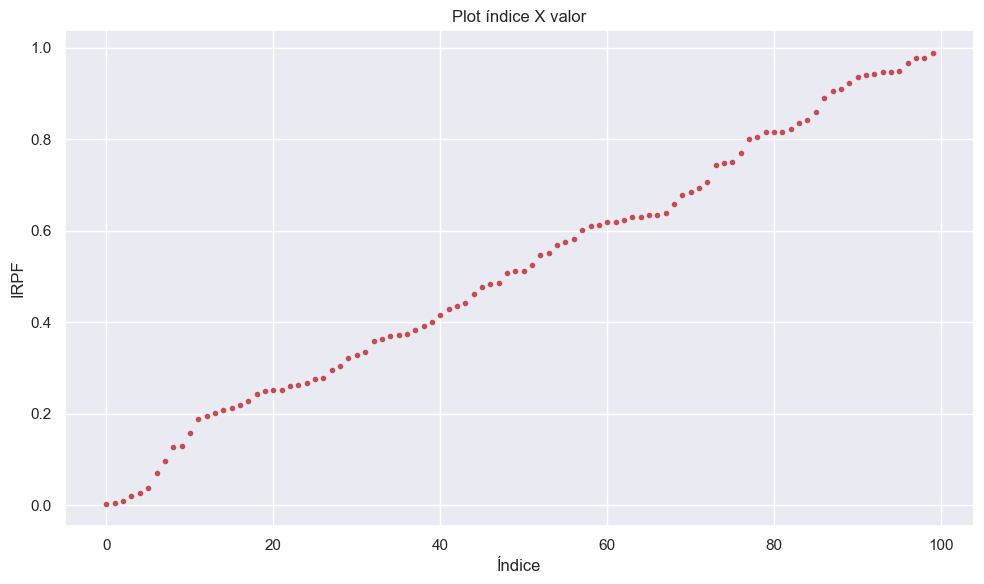

In [68]:
x = np.linspace(0, 10, 100)
x_ = np.linspace(0, 10, 10)


# Correcting the DataFrame creation
dados = pd.DataFrame({
    'IRPF': np.random.rand(100),
    'IMPOSTO SOBRE IMPORTAÇÃO': np.random.rand(100)
})  # Example DataFrame

plt.subplots(figsize=(10, 6))
plt.plot(range(len(dados)), dados['IRPF'].sort_values().values, 'r.')
plt.xlabel('Índice')
plt.ylabel('IRPF')  # Assuming IRPF refers to a tax-related value
plt.title('Plot índice X valor')
plt.grid(True)
plt.tight_layout()



In [ ]:
plt.subplots(figsize=figsize)

cd_ = dados.loc[:,['Ano','mean area']].values
colormap = ['r','b']
plt.plot(cd_[:,0],
         cd_[:,1],
         'r.'
         )

plt.xlabel('Raio médio')
plt.ylabel('Área média')
plt.title('Raio x Área')
plt.grid(True)
plt.show()
plt.tight_layout()

# Machine Learning com justificativas do objetivo e avaliação dos resultados (clusterização ou classificação): 30%